In [2]:
from utils import*

Using TensorFlow backend.


## Parallel Setting

#### Measurements

In [10]:
dataset_name = 'arduino_parallel' 

# Get data: center_1, norm_1
sys = SYSTEM(dataset_name)
meas_dataset = sys.get_dataset(resample_dt=.1)

# Generate center_2, norm_2. remove time offset
folder_path = get_dataset_folder_path(dataset_name) 
create_folder(folder_path + '/tst.csv')
for n, data in enumerate(meas_dataset):
    file_path = folder_path + '/record_' + "{0:0=2d}".format(n) + '.csv'    
    data.time -= data.time.loc[0]
    data =  data.rename(columns={'norm':'norm_1'})
    center_1 = np.array(data.center_1.to_list())
    norm_1 = np.array(data.center_1.to_list())
    data['center_2'] = list(center_1 + c_dist*norm_1)
    data['norm_2'] = list(norm_1)
    data.to_csv(file_path, index=None)     
    

#### Synthetic Data

In [6]:
save_dataset_name = 'synth_2coils_parallel'
c_dist = 3 * 1e-2


# Synthesize center_1, norm_1
synth_dataset = generate_synth_motion_data( 
    'arduino_parallel',  N=2000, D=c_dist/2 )

# Generate center_2, norm_2. remove time offset
folder_path = get_dataset_folder_path(save_dataset_name) 
create_folder(folder_path + '/tst.csv')

time = synth_dataset['time']
for m in range(np.shape(synth_dataset['norm'])[0]):
    file_path = folder_path + '/record_' + "{0:0=4d}".format(m) + '.csv'
    
    data =  pd.DataFrame({ 'time': synth_dataset['time']}) 
    center_1 = synth_dataset['centers'][0, m]
    center_2 = synth_dataset['centers'][1, m]
    norm_1 = synth_dataset['norm'][m]
    norm_2 = norm_1

    data = pd.DataFrame(dict(
        time = time,
        center_1 = list(center_1),
        center_2 = list(center_2),
        norm_1 = list(norm_1),
        norm_2 = list(norm_2)
    ))
    data.to_csv(file_path, index=None)     

## Orthogonal Setting

#### Measurements

In [28]:
dataset_name = 'arduino_orthogonal' 
c_dist = 5.6 * 1e-2

# Get data: center_1, center_2, norm_1
sys = SYSTEM(dataset_name)
meas_dataset = sys.get_dataset(resample_dt=.1, D=c_dist/2)

# Generate norm_2, remove time offset
folder_path = get_dataset_folder_path(dataset_name) 
create_folder(folder_path + '/tst.csv')
for n, data in enumerate(meas_dataset):
    file_path = folder_path + '/record_' + "{0:0=2d}".format(n) + '.csv'    
    data.time -= data.time.loc[0]
    data = data.rename(columns={'norm':'norm_1'})
    center_1 = np.array(data.center_1.to_list())
    center_2 = np.array(data.center_2.to_list())
    data['norm_2']  = list( (center_1-center_2) / np.linalg.norm(center_1-center_2, axis=1).reshape((-1,1)) * np.ones((1,3)) )
    
    data.to_csv(file_path, index=None)     
    

#### Synthetic Data

In [36]:
save_dataset_name = 'synth_orthogonal'
c_dist = 5.6 * 1e-2

# Synthesize center_1, center_2, norm_1
synth_dataset = generate_synth_motion_data('arduino_orthogonal', N=2000)

Generate norm_2 and save data
folder_path = get_dataset_folder_path(save_dataset_name) 
create_folder(folder_path + '/tst.csv')

# Generate norm_2, remove time offset
time = synth_dataset['time']
for m in range(np.shape(synth_dataset['norm'])[0]):
    file_path = folder_path + '/record_' + "{0:0=4d}".format(m) + '.csv'
    
    data =  pd.DataFrame({ 'time': synth_dataset['time']}) 
    center_1 = synth_dataset['centers'][0, m]
    center_2 = synth_dataset['centers'][1, m]
    norm_1 = synth_dataset['norm'][m]
    norm_2  = list( (center_1-center_2) / np.linalg.norm(center_1-center_2, axis=1).reshape((-1,1)) * np.ones((1,3)) )

    data = pd.DataFrame(dict(
        time = time,
        center_1 = list(center_1),
        center_2 = list(center_2),
        norm_1 = list(norm_1),
        norm_2 = list(norm_2)
    ))
    data.to_csv(file_path, index=None)     

In [3]:
dataset = load_dataset('arduino_orthogonal')

In [5]:
dataset[0].head()

,time,norm_1,center_1,center_2,meas_vind_1,meas_vind_2,norm_2,synth_vind_1,synth_vind_2
0,2.5,"[-0.32983006, -0.03876016, 0.94322259]","[0.06602972, -0.0082131, -0.38452087]","[0.03517503, -0.05306022, -0.3975679]",0.766856,0.041539,"[0.55119619, 0.80116075, 0.23307557]",0.783064,0.026427
1,2.6,"[-0.32269776, -0.02782537, 0.94608879]","[0.06887995, -0.00364676, -0.37994927]","[0.0366512, -0.04776212, -0.39224293]",0.773114,0.032711,"[0.57551412, 0.78777543, 0.21952989]",0.818811,0.002297
2,2.7,"[-0.30219412, -0.02857795, 0.9527443]","[0.06799609, -0.00275125, -0.36597539]","[0.03587763, -0.04715544, -0.3774805]",0.841266,0.036818,"[0.57357189, 0.79297045, 0.20545838]",0.946750,0.026401
3,2.8,"[-0.27801992, -0.03112554, 0.96005161]","[0.06081021, -0.0067607, -0.34452943]","[0.02996092, -0.0523096, -0.35494515]",0.990168,0.091280,"[0.55097971, 0.81351999, 0.18602842]",1.195397,0.123502
4,2.9,"[-0.26653971, -0.0308547, 0.96330332]","[0.054812, -0.00966234, -0.32412431]","[0.02549502, -0.05637944, -0.33373991]",1.165630,0.162185,"[0.52364844, 0.83444247, 0.17175004]",1.493079,0.249917


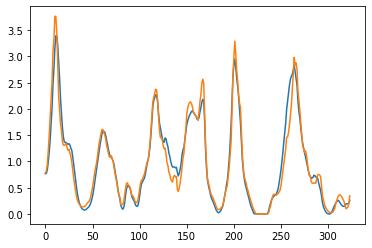

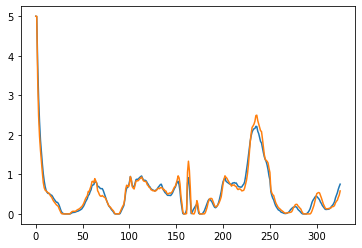

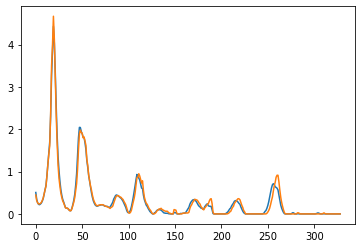

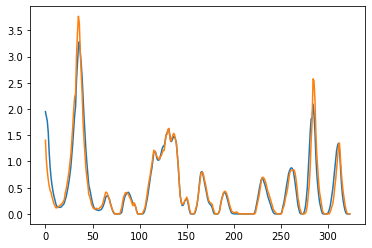

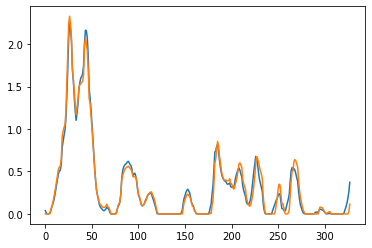

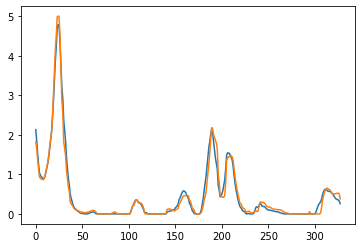

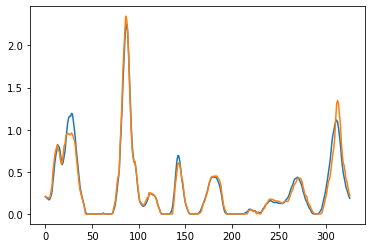

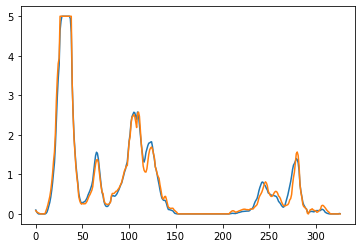

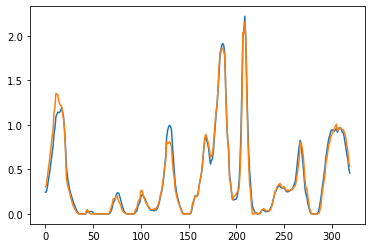

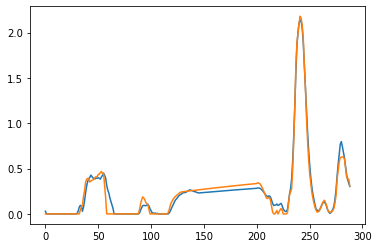

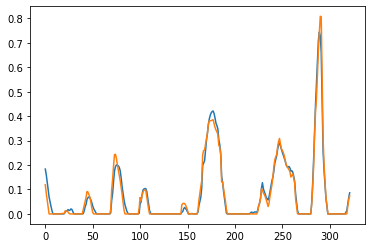

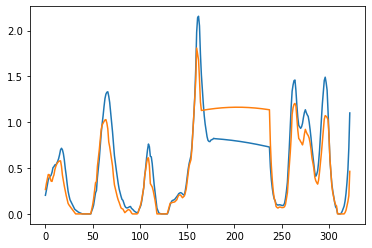

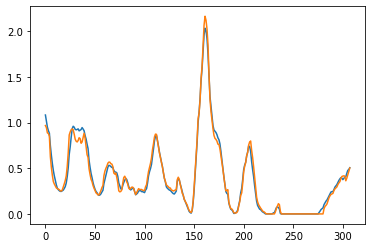

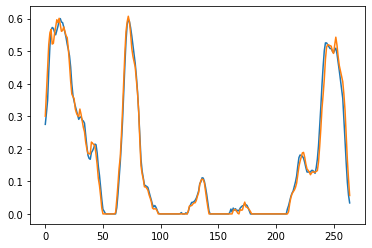

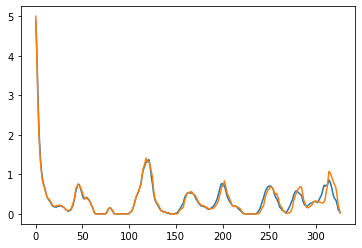

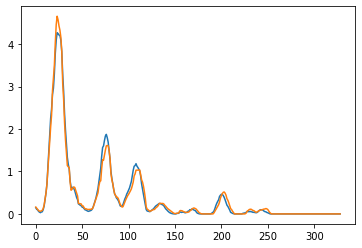

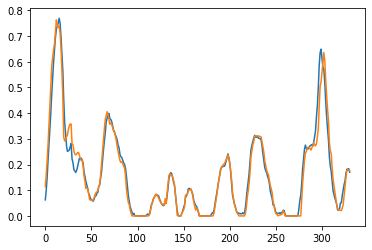

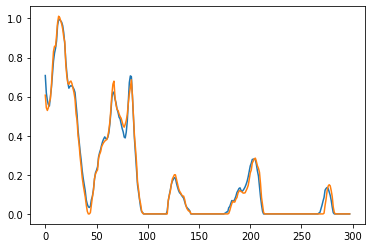

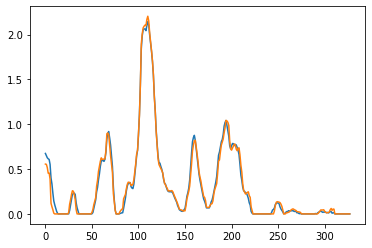

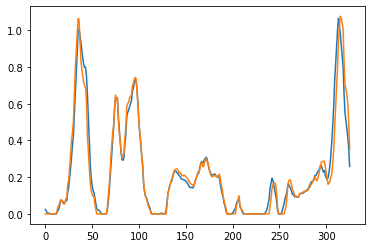

In [9]:
i = 0 
for data in dataset:

#     c1 = np.array(data.center_1.to_list())      
#     c2 = np.array(data.center_2.to_list())  
#     dv = c1 - c2
#     d = np.linalg.norm(c1-c2, axis=1)
#     plt.plot(c1[:,i])
#     plt.plot(c2[:,i])
    plt.plot(data.meas_vind_1.to_numpy())
    plt.plot(data.synth_vind_1.to_numpy())
#     plt.plot(data.meas_vind_2.to_numpy())   
    plt.show() 

